In [201]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Ver.1 - parameters:
* Season
* Stage
* Date
* WIN DRAW LOOSE
* B365H
* B365D
* B365A

* HomeTeam_buildUpPlaySpeed 
* HomeTeam_buildUpPlayPassing
* HomeTeam_chanceCreationShooting
* HomeTeam_defencePressure

* AwayTeam_buildUpPlaySpeed
* AwayTeam_buildUpPlayPassing
* AwayTeam_chanceCreationShooting
* AwayTeam_defencePressure

[parameteres from FIFA - description](http://www.fifplay.com/fifa-17-tactics/)


In [285]:
match=pd.read_csv('2leagues.csv', sep=',')
match = match.set_index(['Match_id'])

match = match.sort_values(['League_id', 'Date'])
match.columns = ['League_id', 'Season', 'Stage', 'Date', 'H_api_id',
                   'A_api_id', 'Result', 'B365H', 'B365D', 'B365A',
                   'H_Speed', 'H_Passing','H_Shooting', 'H_Pressure',
                   'A_Speed', 'A_Passing','A_Shooting', 'A_Pressure']
match.head()

,League_id,Season,Stage,Date,H_api_id,A_api_id,Result,B365H,B365D,B365A,H_Speed,H_Passing,H_Shooting,H_Pressure,A_Speed,A_Passing,A_Shooting,A_Pressure
Match_id,,,,,,,,,,,,,,,,,,
1730,1729,2008/2009,1,2008-08-16,9825,8659,0,1.20,6.5,15.00,66,30,35,30,65,40,55,70
1731,1729,2008/2009,1,2008-08-16,8472,8650,2,5.50,3.6,1.67,60,70,55,35,50,35,70,40
1732,1729,2008/2009,1,2008-08-16,8654,8528,0,1.91,3.4,4.20,58,30,50,30,70,70,50,35
1734,1729,2008/2009,1,2008-08-16,8668,8655,2,2.00,3.3,4.00,60,65,45,40,55,70,55,45
1735,1729,2008/2009,1,2008-08-16,8549,8586,0,3.20,3.4,2.25,70,70,50,30,70,50,50,50


In [286]:
#removing empty fields in B365 for Match_id = 21631
row_with_empties = 21631
match[ match['B365H'].isnull()]
bets = ['B365H', 'B365D', 'B365A']
emptys = match[ match['H_api_id'].isin([8302]) & match['A_api_id'].isin([9869])]
means = emptys[bets].mean()
for i in range(3):
    match.set_value([row_with_empties], bets[i], means[i])

match.isnull().values.any()



False

In [287]:
match

,League_id,Season,Stage,Date,H_api_id,A_api_id,Result,B365H,B365D,B365A,H_Speed,H_Passing,H_Shooting,H_Pressure,A_Speed,A_Passing,A_Shooting,A_Pressure
Match_id,,,,,,,,,,,,,,,,,,
1730,1729,2008/2009,1,2008-08-16,9825,8659,0,1.20,6.50,15.00,66,30,35,30,65,40,55,70
1731,1729,2008/2009,1,2008-08-16,8472,8650,2,5.50,3.60,1.67,60,70,55,35,50,35,70,40
1732,1729,2008/2009,1,2008-08-16,8654,8528,0,1.91,3.40,4.20,58,30,50,30,70,70,50,35
1734,1729,2008/2009,1,2008-08-16,8668,8655,2,2.00,3.30,4.00,60,65,45,40,55,70,55,45
1735,1729,2008/2009,1,2008-08-16,8549,8586,0,3.20,3.40,2.25,70,70,50,30,70,50,50,50
1736,1729,2008/2009,1,2008-08-16,8559,10194,0,1.83,3.50,4.50,55,70,45,35,65,70,55,35
1737,1729,2008/2009,1,2008-08-16,8667,9879,0,2.60,3.20,2.80,65,60,55,70,60,70,50,40
1729,1729,2008/2009,1,2008-08-17,10260,10261,1,1.29,5.50,11.00,70,45,65,40,70,60,60,45
1733,1729,2008/2009,1,2008-08-17,10252,8456,0,1.91,3.40,4.33,70,59,50,30,70,60,70,45


## Approach 1 - Log Reg

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
results = y_test.to_frame().reset_index()

In [290]:
#Logistic Regression
alg1 = LogisticRegression(random_state=1)
alg1.fit(X_train, y_train)
predictions = alg1.predict(X_test)
predictions = pd.Series(predictions)
results['predictions'] = predictions

In [291]:
results

,Match_id,Result,predictions
0,21734,2,2
1,1959,0,0
2,2009,0,0
3,4681,0,0
4,2194,1,2
5,23609,0,2
6,24493,2,2
7,3334,0,0
8,21793,0,0
9,22483,0,0


In [292]:
results['correct'] = results.apply(lambda x: 1 if x['Result']==x['predictions'] else 0, axis=1)
results['correct'].sum()/len(results)

0.5520677628300946

## Approach 2 - different algorithms comparison

Alg/res.mean/res.std
LR: 0.543257 (0.010175)
LDA: 0.540296 (0.002727)
KNN: 0.470066 (0.002349)
CART: 0.431908 (0.016011)
NB: 0.450493 (0.003202)
SVM: 0.465461 (0.003678)


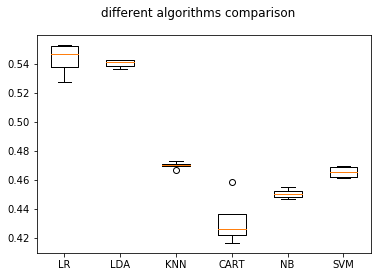

In [309]:
predictors = ['B365H', 'B365D', 'B365A',
               'H_Speed', 'H_Passing','H_Shooting', 'H_Pressure',
               'A_Speed', 'A_Passing','A_Shooting', 'A_Pressure']

X = match[predictors]
y = match['Result']



algs = []
algs.append(('LR', LogisticRegression()))
algs.append(('LDA', LinearDiscriminantAnalysis()))
algs.append(('KNN', KNeighborsClassifier()))
algs.append(('CART', DecisionTreeClassifier()))
algs.append(('NB', GaussianNB()))
algs.append(('SVM', SVC())) 

results = []
names = []
print ("Alg/res.mean/res.std")
for name, model in algs:
    cross_validator = model_selection.KFold(n_splits=4, shuffle=True)
    res = model_selection.cross_val_score(model, X, y, 
                                          cv=cross_validator, 
                                          scoring = 'accuracy')
    results.append(res)
    names.append(name)
    info = "%s: %f (%f)" % (name, res.mean(), res.std())
    print(info)
    
    

fig = plt.figure()
fig.suptitle('different algorithms comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Ver.2 - extra paraameters 
FOR BOTH TEAMS:
* buildUpPlayDribbling
* chanceCreationPassing
* chanceCreationCrossing
* defenceAggression
* defenceTeamWidth


In [335]:
match2=pd.read_csv('2leagues_v2.csv', sep=',')
match2 = match2.set_index(['Match_id'])

match2 = match2.sort_values(['League_id', 'Date'])
match2.columns = ['League_id', 'Season', 'Stage', 'Date', 'H_api_id',
                   'A_api_id', 'Result', 'B365H', 'B365D', 'B365A',
                   'H_Speed', 'H_Pass','H_Shoot', 'H_Pressure', 
                   'H_Drib', 'H_chPass', 'H_chCross', 'H_dAggr', 'H_dWidth',
                   'A_Speed', 'A_Pass','A_Shoot', 'A_Pressure',
                   'A_Drib', 'A_chPass', 'A_chCross', 'A_dAggr', 'A_dWidth']
match2.head()

,League_id,Season,Stage,Date,H_api_id,A_api_id,Result,B365H,B365D,B365A,...,H_dWidth,A_Speed,A_Pass,A_Shoot,A_Pressure,A_Drib,A_chPass,A_chCross,A_dAggr,A_dWidth
Match_id,,,,,,,,,,,,,,,,,,,,,
1730,1729,2008/2009,1,2008-08-16,9825,8659,0,1.20,6.5,15.00,...,50,65,40,55,70,NaN,70,70,70,70
1731,1729,2008/2009,1,2008-08-16,8472,8650,2,5.50,3.6,1.67,...,35,50,35,70,40,NaN,50,60,60,40
1732,1729,2008/2009,1,2008-08-16,8654,8528,0,1.91,3.4,4.20,...,30,70,70,50,35,NaN,70,70,70,35
1734,1729,2008/2009,1,2008-08-16,8668,8655,2,2.00,3.3,4.00,...,40,55,70,55,45,NaN,60,70,70,45
1735,1729,2008/2009,1,2008-08-16,8549,8586,0,3.20,3.4,2.25,...,30,70,50,50,50,NaN,50,65,50,50


In [295]:
#Check for nulls
match2.isnull().sum()

League_id        0
Season           0
Stage            0
Date             0
H_api_id         0
A_api_id         0
Result           0
B365H            1
B365D            1
B365A            1
H_Speed          0
H_Pass           0
H_Shoot          0
H_Pressure       0
H_Drib        4372
H_chPass         0
H_chCross        0
H_dAggr          0
H_dWidth         0
A_Speed          0
A_Pass           0
A_Shoot          0
A_Pressure       0
A_Drib        4372
A_chPass         0
A_chCross        0
A_dAggr          0
A_dWidth         0
dtype: int64

In [336]:
#removing empty fields in B365 
bets = ['B365H', 'B365D', 'B365A']
emptys = match[ match['H_api_id'].isin([8302]) & match['A_api_id'].isin([9869])]
means = emptys[bets].mean()
miss_row = match2.loc[ match2['B365H'].isnull()]
match2.loc[21631, bets] = means

In [337]:
#removing Dribbling columns
dribbling_cols = ['H_Drib', 'A_Drib']
match2 = match2.drop(dribbling_cols, 1)

In [298]:
match2.isnull().any().any()

False

In [299]:
match2.head()

,League_id,Season,Stage,Date,H_api_id,A_api_id,Result,B365H,B365D,B365A,...,H_dAggr,H_dWidth,A_Speed,A_Pass,A_Shoot,A_Pressure,A_chPass,A_chCross,A_dAggr,A_dWidth
Match_id,,,,,,,,,,,,,,,,,,,,,
1730,1729,2008/2009,1,2008-08-16,9825,8659,0,1.20,6.5,15.00,...,40,50,65,40,55,70,70,70,70,70
1731,1729,2008/2009,1,2008-08-16,8472,8650,2,5.50,3.6,1.67,...,70,35,50,35,70,40,50,60,60,40
1732,1729,2008/2009,1,2008-08-16,8654,8528,0,1.91,3.4,4.20,...,70,30,70,70,50,35,70,70,70,35
1734,1729,2008/2009,1,2008-08-16,8668,8655,2,2.00,3.3,4.00,...,70,40,55,70,55,45,60,70,70,45
1735,1729,2008/2009,1,2008-08-16,8549,8586,0,3.20,3.4,2.25,...,70,30,70,50,50,50,50,65,50,50


Alg/res.mean/res.std
LR: 0.542763 (0.017781)
LDA: 0.538651 (0.007706)
KNN: 0.461184 (0.011518)
CART: 0.434704 (0.016417)
NB: 0.447204 (0.011503)
SVM: 0.469737 (0.008578)


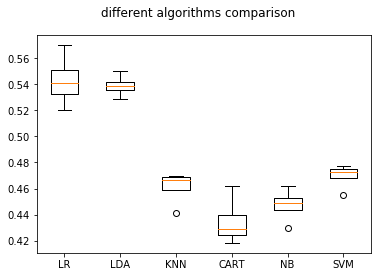

In [338]:
predictors = ['B365H', 'B365D', 'B365A',
                   'H_Speed', 'H_Pass','H_Shoot', 'H_Pressure', 
                   'H_chPass', 'H_chCross', 'H_dAggr', 'H_dWidth',
                   'A_Speed', 'A_Pass','A_Shoot', 'A_Pressure',
                   'A_chPass', 'A_chCross', 'A_dAggr', 'A_dWidth']

predictors2 = ['B365H', 'B365D', 'B365A']

X = match2[predictors]
y = match2['Result']

algs = []
algs.append(('LR', LogisticRegression()))
algs.append(('LDA', LinearDiscriminantAnalysis()))
algs.append(('KNN', KNeighborsClassifier()))
algs.append(('CART', DecisionTreeClassifier()))
algs.append(('NB', GaussianNB()))
algs.append(('SVM', SVC())) 

results = []
names = []
print ("Alg/res.mean/res.std")
for name, model in algs:
    cross_validator = model_selection.KFold(n_splits=4, shuffle=True)
    res = model_selection.cross_val_score(model, X, y, 
                                          cv=cross_validator, 
                                          scoring = 'accuracy')
    results.append(res)
    names.append(name)
    info = "%s: %f (%f)" % (name, res.mean(), res.std())
    print(info)
    
    

fig = plt.figure()
fig.suptitle('different algorithms comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Alg/res.mean/res.std
LR: 0.545230 (0.016600)
LDA: 0.539638 (0.009191)
KNN: 0.461678 (0.004707)
CART: 0.439474 (0.001974)
NB: 0.452796 (0.004323)
SVM: 0.462171 (0.014327)


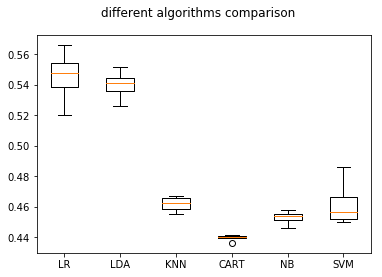

In [314]:
predictors2 = ['B365H', 'B365D', 'B365A']

X = match2[predictors]
y = match2['Result']

algs = []
algs.append(('LR', LogisticRegression()))
algs.append(('LDA', LinearDiscriminantAnalysis()))
algs.append(('KNN', KNeighborsClassifier()))
algs.append(('CART', DecisionTreeClassifier()))
algs.append(('NB', GaussianNB()))
algs.append(('SVM', SVC())) 

results = []
names = []
print ("Alg/res.mean/res.std")
for name, model in algs:
    cross_validator = model_selection.KFold(n_splits=4, shuffle=True)
    res = model_selection.cross_val_score(model, X, y, 
                                          cv=cross_validator, 
                                          scoring = 'accuracy')
    results.append(res)
    names.append(name)
    info = "%s: %f (%f)" % (name, res.mean(), res.std())
    print(info)
    
    

fig = plt.figure()
fig.suptitle('different algorithms comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
## adding teams names 

In [315]:
match2.head()

,League_id,Season,Stage,Date,H_api_id,A_api_id,Result,B365H,B365D,B365A,...,H_dAggr,H_dWidth,A_Speed,A_Pass,A_Shoot,A_Pressure,A_chPass,A_chCross,A_dAggr,A_dWidth
Match_id,,,,,,,,,,,,,,,,,,,,,
1730,1729,2008/2009,1,2008-08-16,9825,8659,0,1.20,6.5,15.00,...,40,50,65,40,55,70,70,70,70,70
1731,1729,2008/2009,1,2008-08-16,8472,8650,2,5.50,3.6,1.67,...,70,35,50,35,70,40,50,60,60,40
1732,1729,2008/2009,1,2008-08-16,8654,8528,0,1.91,3.4,4.20,...,70,30,70,70,50,35,70,70,70,35
1734,1729,2008/2009,1,2008-08-16,8668,8655,2,2.00,3.3,4.00,...,70,40,55,70,55,45,60,70,70,45
1735,1729,2008/2009,1,2008-08-16,8549,8586,0,3.20,3.4,2.25,...,70,30,70,50,50,50,50,65,50,50


In [339]:
team_names = pd.read_csv('Teams.csv', sep=',').set_index('team_api_id')['team_long_name']
cols = ['H_api_id', 'A_api_id']
match2[cols] = match2[cols].replace(team_names)
match2 = match2.rename(columns={'H_api_id': 'H_team', 'A_api_id': 'A_team'})
match2


,League_id,Season,Stage,Date,H_team,A_team,Result,B365H,B365D,B365A,...,H_dAggr,H_dWidth,A_Speed,A_Pass,A_Shoot,A_Pressure,A_chPass,A_chCross,A_dAggr,A_dWidth
Match_id,,,,,,,,,,,,,,,,,,,,,
1730,1729,2008/2009,1,2008-08-16,Arsenal,West Bromwich Albion,0,1.20,6.50,15.00,...,40,50,65,40,55,70,70,70,70,70
1731,1729,2008/2009,1,2008-08-16,Sunderland,Liverpool,2,5.50,3.60,1.67,...,70,35,50,35,70,40,50,60,60,40
1732,1729,2008/2009,1,2008-08-16,West Ham United,Wigan Athletic,0,1.91,3.40,4.20,...,70,30,70,70,50,35,70,70,70,35
1734,1729,2008/2009,1,2008-08-16,Everton,Blackburn Rovers,2,2.00,3.30,4.00,...,70,40,55,70,55,45,60,70,70,45
1735,1729,2008/2009,1,2008-08-16,Middlesbrough,Tottenham Hotspur,0,3.20,3.40,2.25,...,70,30,70,50,50,50,50,65,50,50
1736,1729,2008/2009,1,2008-08-16,Bolton Wanderers,Stoke City,0,1.83,3.50,4.50,...,70,35,65,70,55,35,70,70,70,35
1737,1729,2008/2009,1,2008-08-16,Hull City,Fulham,0,2.60,3.20,2.80,...,70,70,60,70,50,40,70,70,35,40
1729,1729,2008/2009,1,2008-08-17,Manchester United,Newcastle United,1,1.29,5.50,11.00,...,50,40,70,60,60,45,65,70,65,45
1733,1729,2008/2009,1,2008-08-17,Aston Villa,Manchester City,0,1.91,3.40,4.33,...,70,30,70,60,70,45,55,70,55,45


In [365]:
clubs = match2['H_team'].unique()
clubs = clubs.tolist()

type(clubs)

list

In [369]:
clubs_TMV = pd.read_csv('teamsAgeTMV.csv', sep=',')
clubs_TMV

,Unnamed: 0,Club,Age16,TMV16,Age15,TMV15,Age14,TMV14,Age13,TMV13,Age12,TMV12,Age11,TMV11,Age10,TMV10,Age09,TMV09,Age08,TMV08
0,0,Real Madrid CF,27.2,764.0,23.8,700.0,23.3,647.0,24.0,606.0,24.5,593.0,23.7,525.0,23.3,506.0,24.5,489.0,25.6,361.0
1,1,FC Barcelona,27.3,758.0,24.9,618.0,24.4,598.0,24.8,620.0,25.2,621.0,23.9,621.0,23.8,561.0,24.1,425.0,25.4,367.0
2,2,Atlético Madrid,27.7,501.0,24.4,336.0,24.7,289.0,23.9,262.0,24.3,177.0,23.8,202.0,24.1,196.0,23.1,210.0,25.6,193.0
3,3,Sevilla FC,27.6,236.0,24.8,186.0,24.7,122.0,23.8,147.0,24.3,134.0,24.4,145.0,24.4,225.0,24.5,213.0,24.9,170.0
4,4,Valencia CF,26.3,185.0,22.7,254.0,23.1,137.0,24.3,180.0,24.6,171.0,24.9,169.0,25.4,178.0,24.6,213.0,25.8,198.0
5,5,Villarreal CF,27.9,174.0,24.4,115.0,23.1,88.0,23.5,62.0,NaN,NaN,24.4,149.0,24.3,145.0,25.5,166.0,25.6,131.0
6,6,Athletic Bilbao,27.7,157.0,26.0,122.0,25.2,110.0,24.7,115.0,23.2,117.0,24.2,114.0,24.2,98.0,24.2,76.0,25.2,59.0
7,7,Real Sociedad,26.7,114.0,24.6,122.0,24.6,107.0,24.7,116.0,24.7,69.0,24.4,70.0,24.8,43.0,NaN,NaN,NaN,NaN
8,8,Celta de Vigo,26.3,105.0,23.6,63.0,23.3,39.0,24.7,56.0,25.4,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,Málaga CF,27.2,77.0,26.0,78.0,25.6,62.0,25.0,64.0,25.8,111.0,26.0,128.0,25.5,82.0,24.2,61.0,26.6,39.0


In [366]:
pd.Series(list(set(clubs).intersection(set(clubs_TMV))))

0                  Granada CF
1             West Ham United
2               Real Sociedad
3                 Valencia CF
4                 CD Numancia
5             Manchester City
6            Blackburn Rovers
7                  CA Osasuna
8           Tottenham Hotspur
9     Wolverhampton Wanderers
10             Leicester City
11              UD Las Palmas
12             Rayo Vallecano
13            Birmingham City
14                  Málaga CF
15           Bolton Wanderers
16        Real Betis Balompié
17                   SD Eibar
18        Queens Park Rangers
19               Swansea City
20             Wigan Athletic
21           Racing Santander
22                 Sevilla FC
23             Real Madrid CF
24            Atlético Madrid
25            Athletic Bilbao
26       West Bromwich Albion
27          Manchester United
28               Cardiff City
29                CD Tenerife
30                Aston Villa
31                 Stoke City
32                 Levante UD
33        

In [367]:
match2

,League_id,Season,Stage,Date,H_team,A_team,Result,B365H,B365D,B365A,...,H_dAggr,H_dWidth,A_Speed,A_Pass,A_Shoot,A_Pressure,A_chPass,A_chCross,A_dAggr,A_dWidth
Match_id,,,,,,,,,,,,,,,,,,,,,
1730,1729,2008/2009,1,2008-08-16,Arsenal,West Bromwich Albion,0,1.20,6.50,15.00,...,40,50,65,40,55,70,70,70,70,70
1731,1729,2008/2009,1,2008-08-16,Sunderland,Liverpool,2,5.50,3.60,1.67,...,70,35,50,35,70,40,50,60,60,40
1732,1729,2008/2009,1,2008-08-16,West Ham United,Wigan Athletic,0,1.91,3.40,4.20,...,70,30,70,70,50,35,70,70,70,35
1734,1729,2008/2009,1,2008-08-16,Everton,Blackburn Rovers,2,2.00,3.30,4.00,...,70,40,55,70,55,45,60,70,70,45
1735,1729,2008/2009,1,2008-08-16,Middlesbrough,Tottenham Hotspur,0,3.20,3.40,2.25,...,70,30,70,50,50,50,50,65,50,50
1736,1729,2008/2009,1,2008-08-16,Bolton Wanderers,Stoke City,0,1.83,3.50,4.50,...,70,35,65,70,55,35,70,70,70,35
1737,1729,2008/2009,1,2008-08-16,Hull City,Fulham,0,2.60,3.20,2.80,...,70,70,60,70,50,40,70,70,35,40
1729,1729,2008/2009,1,2008-08-17,Manchester United,Newcastle United,1,1.29,5.50,11.00,...,50,40,70,60,60,45,65,70,65,45
1733,1729,2008/2009,1,2008-08-17,Aston Villa,Manchester City,0,1.91,3.40,4.33,...,70,30,70,60,70,45,55,70,55,45


In [368]:
match2.to_csv('learning_data01.csv')